### CLASSIFICATION

In [1]:
import pandas as pd
from utils import compute_metrics, test_predictions, extract_website_name, print_values
from plots import stats_plot, distr_plot

In [2]:
# Confidence sampling threshold for predictions
th = 0.995

### FIRST CLASSIFIER / XLM-ROBERTA:

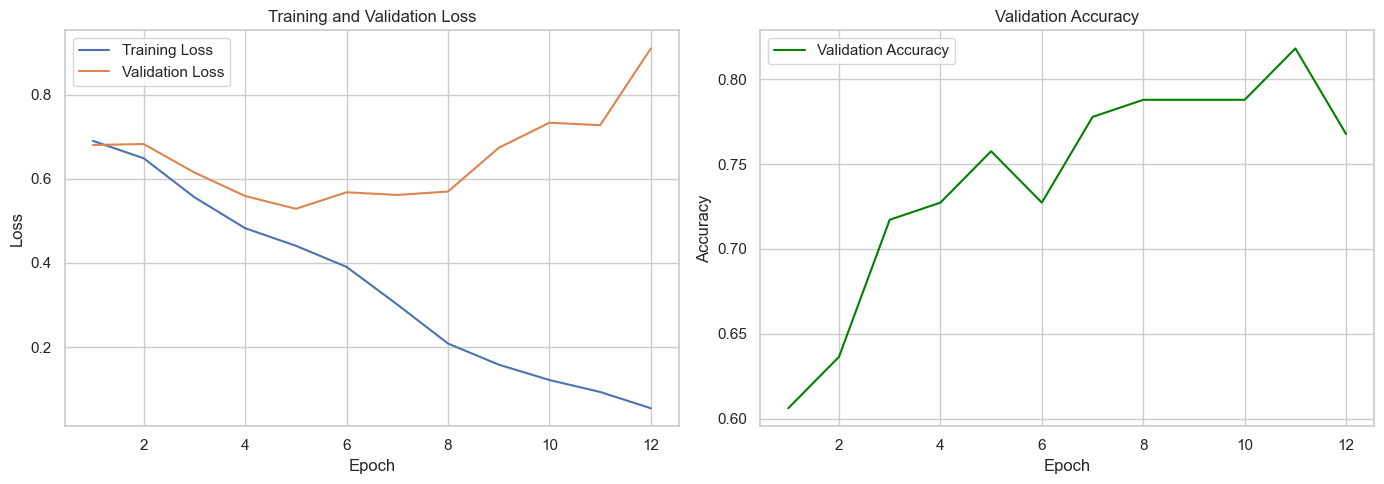

In [3]:
cls1stats = pd.read_csv('XLM-RoBERTa_epoch_stats_2024-04-17-07-09.csv')

stats_plot(cls1stats)

In [4]:
cls1valpreds = pd.read_csv('XLM-RoBERTa_validation_predictions_with_confidence_2024-04-17-07-09.csv')
gold = pd.read_csv('goldstandard-dataset.csv')

cls1valpredswt = pd.merge(cls1valpreds, gold, on='EstText Index', how='inner')
cls1valpredswt = cls1valpredswt.rename(columns={'Label_x': 'Prediction', 'Label_y': 'True Label'})
cls1valpredswt = cls1valpredswt.drop(['Text'], axis=1)

compute_metrics(cls1valpredswt, th)

Threshold 0.995:
Sample Size: 57/99
F1 Score: 0.8000 ± 0.1038
Precision: 1.0000 ± 0.0000
Accuracy: 0.9123 ± 0.0734



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


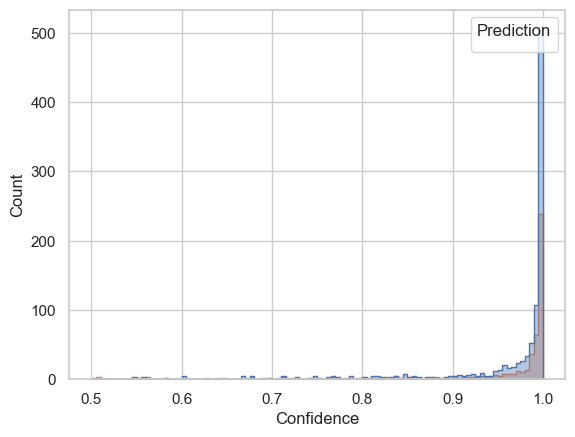

In [5]:
cls1testpreds = pd.read_csv('XLM-RoBERTa_test_predictions_2024-04-17-07-21.csv')

distr_plot(cls1testpreds)

In [6]:
test_predictions(cls1testpreds, th)

Threshold 0.995:
0: 499
1: 223
Adding to the dataset: 722


### SECOND CLASSIFIER / XLM-ROBERTA:

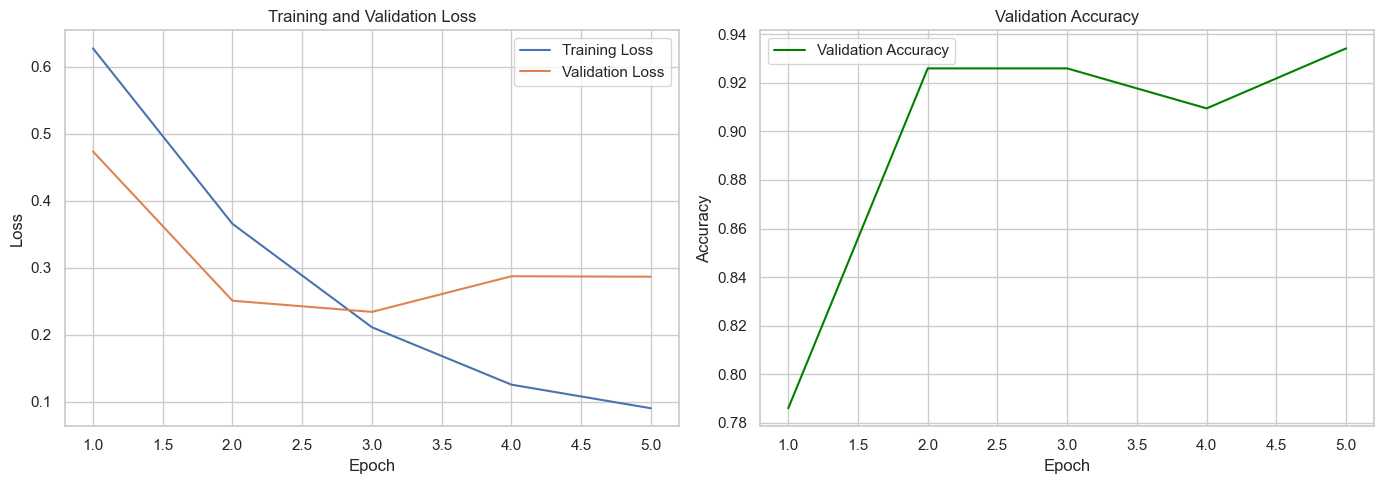

In [7]:
cls2stats = pd.read_csv('XLM-RoBERTa_epoch_stats_2024-04-17-17-16.csv')

stats_plot(cls2stats)

In [8]:
cls2input = pd.read_csv('cls2-sim-input-est.csv').drop(['Text'], axis=1)

cls2valpreds = pd.read_csv('XLM-RoBERTa_validation_predictions_with_confidence_2024-04-17-17-16.csv')

cls2valpredswt = pd.merge(cls2valpreds, cls2input, on='EstText Index', how='inner')
cls2valpredswt = cls2valpredswt.rename(columns={'Label_x': 'Prediction', 'Label_y': 'True Label'})

compute_metrics(cls2valpredswt, th)

Threshold 0.995:
Sample Size: 165/243
F1 Score: 0.9643 ± 0.0283
Precision: 0.9419 ± 0.0357
Accuracy: 0.9636 ± 0.0286



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


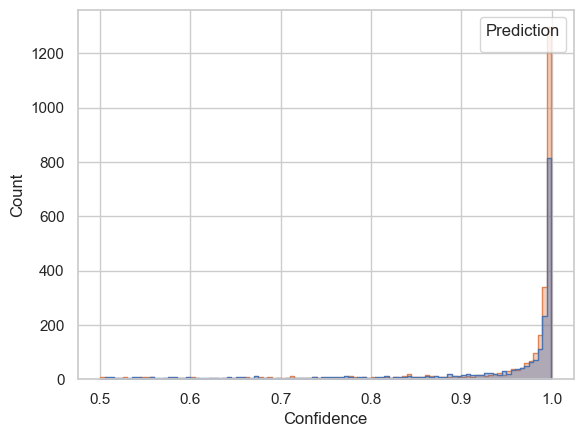

In [9]:
cls2testpreds = pd.read_csv('XLM-RoBERTa_test_predictions_2024-04-17-18-01.csv')

distr_plot(cls2testpreds)

In [10]:
test_predictions(cls2testpreds, th)

Threshold 0.995:
1: 771
0: 1229
Adding to the dataset: 2000


### CLS2 OUTPUT ANNOTATION / RANDOM SAMPLE=300

In [11]:
mannt2 = pd.read_csv('cls2-full-silver-annotation.csv')
mannt2 = mannt2[['EstText Index', 'Label', 'Annotation']]
mannt2 = mannt2.rename(columns={'Label': 'True Label', 'Annotation': 'Prediction'})

print_values(mannt2, 'Prediction')

0: 140 (46.7%)
1: 88 (29.3%)
2: 72 (24.0%)


Only medicine-related articles:

In [12]:
mannt2_no_health = mannt2[mannt2['Prediction'] != 2]

compute_metrics(mannt2_no_health, 0)

Sample Size: 228/228
F1 Score: 0.8791 ± 0.0423
Precision: 0.9091 ± 0.0373
Accuracy: 0.9035 ± 0.0383



All articles:

In [13]:
mannt3 = pd.read_csv('cls2-out-w-health.csv')
mannt3 = mannt3[['EstText Index', 'Label', 'Annotation']]
mannt3 = mannt3.rename(columns={'Label': 'True Label', 'Annotation': 'Prediction'})

print_values(mannt3, 'Prediction')

0: 182 (60.7%)
1: 118 (39.3%)


In [14]:
compute_metrics(mannt3, 0)

Sample Size: 300/300
F1 Score: 0.7971 ± 0.0455
Precision: 0.9322 ± 0.0284
Accuracy: 0.8133 ± 0.0441



Only non-medicine artciles:

In [15]:
mannt3only = pd.read_csv('cls2-out-only-health.csv')
mannt3only = mannt3only[['EstText Index', 'Label', 'Annotation']]
mannt3only = mannt3only.rename(columns={'Label': 'True Label', 'Annotation': 'Prediction'})

print_values(mannt3only, 'Prediction')

0: 42 (58.3%)
1: 30 (41.7%)


In [16]:
compute_metrics(mannt3only, 0)

Sample Size: 72/72
F1 Score: 0.6383 ± 0.1110
Precision: 1.0000 ± 0.0000
Accuracy: 0.5278 ± 0.1153



### FINAL DATASET:

In [17]:
# gold + cls1 output + cls2 output
output = pd.read_csv('all-output-after-cls2.csv')

estonian_news = pd.read_csv('all_est_news.csv')
estonian_news = estonian_news.reset_index().rename(columns={'index': 'EstText Index'})

fulloutput = pd.merge(output, estonian_news, on='EstText Index', how='inner')
fulloutput = fulloutput.drop(['Unnamed: 0', 'Canonical_Link', 'Authors', 'Tags', 'Meta_Lang'], axis=1)
fulloutput = fulloutput.rename(columns={'EstText Index': 'ID', 'Publish_Date': 'Date'}).sort_values(by='ID')
fulloutput['Website'] = fulloutput['URL'].apply(extract_website_name)
# fulloutput.to_csv('final-dataset-2704.csv', index=False)

In [18]:
print_values(fulloutput, 'Label')

1: 1646 (51.2%)
0: 1569 (48.8%)


In [19]:
print_values(fulloutput, 'Website')

tervise.geenius.ee: 1034 (32.2%)
uueduudised.ee: 801 (24.9%)
telegram.ee: 788 (24.5%)
objektiiv.ee: 580 (18.0%)
vanglaplaneet.ee: 1 (0.0%)
haigekassa.ee: 1 (0.0%)
forte.delfi.ee: 1 (0.0%)
minuaeg.com: 1 (0.0%)
ravimiamet.ee: 1 (0.0%)
naine.postimees.ee: 1 (0.0%)
pealinn.ee: 1 (0.0%)
itk.ee: 1 (0.0%)
menu.err.ee: 1 (0.0%)
tervis.postimees.ee: 1 (0.0%)
novaator.err.ee: 1 (0.0%)
m.delfi.ee: 1 (0.0%)
